#

# HEALTHCARE DATA ANALYSIS 

## BUSINESS UNDERSTANDING

### PROBLEM STATEMENT
### OBJECTIVES



## DATA UNDERSTANDING

In [5]:
#Importing python libraries
import os
import missingno
import pandas as pd
from classes import *
from IPython.display import display, HTML

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
# Instantiate the DataLoader class
loader= DataLoader()

# Reading the csv file
df=loader.read_data("Healthcare Dataset.xlsx").set_index('_index')

# Instantiate the DataInfo class
summary= DataInfo()

# Summary view of the dataset information
summary.info(df)

# setting to view all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Shape of the dataset : (6158, 31) 

Column Names
Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'How many children do you have, if any?',
       'Employment Status', 'Monthly Household Income',
       'Have you ever had health insurance?', 'If yes, which insurance cover?',
       'When was the last time you visited a hospital for medical treatment? (In Months)',
       'Did you have health insurance during your last hospital visit?',
       'Have you ever had a routine check-up with a doctor or healthcare provider?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
       'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?',

,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,"How many children do you have, if any?",When was the last time you visited a hospital for medical treatment? (In Months),Your Picture,Your Picture_URL,_id,_submission_time,_validation_status,_notes,_tags
count,5805.000000,5805.000000,5805.000000,5805.000000,6010,5533.000000,6000.000000,0.0,0.0,6.158000e+03,6158,0.0,0.0,0.0
mean,-0.737841,36.715208,1536.439555,71.217272,2023-06-23 12:19:03.484193280,147.165371,6.651875,NaN,NaN,2.482603e+08,2023-06-25 04:21:26.056349440,NaN,NaN,NaN
min,-4.051936,34.092111,-201.295000,0.000000,2023-05-15 08:35:00,0.000000,0.000000,NaN,NaN,2.301624e+08,2023-04-05 08:44:06,NaN,NaN,NaN
25%,-1.259315,36.379644,1348.900024,4.100000,2023-06-16 10:18:30,1.000000,2.000000,NaN,NaN,2.469582e+08,2023-06-19 10:27:25.750000128,NaN,NaN,NaN
50%,-0.726425,36.866007,1592.900024,4.820000,2023-06-23 10:22:00,2.000000,4.000000,NaN,NaN,2.486249e+08,2023-06-26 09:56:12.500000,NaN,NaN,NaN
75%,-0.378057,37.146309,1857.600000,7.196000,2023-06-30 15:33:30,3.000000,8.000000,NaN,NaN,2.499817e+08,2023-07-03 13:40:47,NaN,NaN,NaN
max,1.842157,39.692109,2988.477000,4900.000000,2023-07-27 12:00:00,800159.000000,2021.000000,NaN,NaN,2.584794e+08,2023-08-07 09:12:14,NaN,NaN,NaN
std,0.870519,0.866878,494.157138,388.100302,NaN,10757.084650,37.295530,NaN,NaN,2.565886e+06,NaN,NaN,NaN,NaN


Dataset Overview


,Location,_Location_latitude,_Location_longitude,_Location_altitude,_Location_precision,Date and Time,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",Your Picture,Your Picture_URL,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags
_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.2742007 36.058336 1882.2000732421875 20.0,-0.274201,36.058336,1882.200073,20.0,NaT,41-50,Female,Married,2.0,Self-employed,20001-30000,Yes,Nhif,53.0,No,Yes,2,No,2,NaN,NaN,230162389,aa30304f-84f2-4c1b-b30a-371241f2ff17,2023-04-05 08:44:06,NaN,NaN,submitted_via_web,NaN,vJ8gEKnN2pccxThc5jnkz4,NaN
2,-0.7158125 37.1475058 1361.9000244140625 20.0,-0.715812,37.147506,1361.900024,20.0,2023-05-15 13:38:00,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NaN,8.0,No,Yes,1,No,NaN,NaN,NaN,238299334,63c461e3-b3ef-47cf-9632-0c912a639f46,2023-05-15 10:44:01,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
3,-0.7158157 37.1475082 1361.9000244140625 20.0,-0.715816,37.147508,1361.900024,20.0,2023-05-15 13:49:00,41-50,Female,Married,5.0,Self-employed,20001-30000,No,Nhif,6.0,Yes,No,NaN,Yes,4+,NaN,NaN,238301092,4209a55d-a983-433f-8ce0-bce6cd28d713,2023-05-15 10:51:08,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
4,-0.7157082 37.14749 1361.9000244140625 20.0,-0.715708,37.147490,1361.900024,20.0,2023-05-15 14:19:00,18-30,Male,Single,NaN,Self-employed,10001-20000,Yes,Nhif,16.0,Yes,No,NaN,No,NaN,NaN,NaN,238311207,2eba9b13-1706-4faf-b7a7-e45e9dcf48ab,2023-05-15 11:22:19,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN
5,-0.7157337 37.1474799 1361.9000244140625 20.0,-0.715734,37.147480,1361.900024,20.0,2023-05-15 14:30:00,41-50,Male,Married,7.0,Self-employed,20001-30000,Yes,Nhif,13.0,Yes,No,NaN,Yes,4+,NaN,NaN,238314477,1f49cb82-75ff-4391-b69b-973a6ce698ee,2023-05-15 11:33:21,NaN,NaN,submitted_via_web,safra_data,vMrCPR7NLZZJrf4PTsQ8uH,NaN


**Observation**
***

- Dataset has 6158 rows and 31 columns


## DATA PREPARATION

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'How many children do you have, if any?',
       'Employment Status', 'Monthly Household Income',
       'Have you ever had health insurance?', 'If yes, which insurance cover?',
       'When was the last time you visited a hospital for medical treatment? (In Months)',
       'Did you have health insurance during your last hospital visit?',
       'Have you ever had a routine check-up with a doctor or healthcare provider?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
       'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?',
       'Your Picture', 'Your Picture_URL', '_id'

In [11]:
# Dropping all columns with null values
df = df.dropna(axis=1, how='all')

df.shape

(6158, 26)

In [12]:
# Columns to drop
to_delete=['__version__','_status','_submitted_by','_uuid']

# Dropping columns
df.drop(columns=to_delete, inplace= True, axis=1)
df.shape

(6158, 22)

In [13]:
df.dropna(axis=0, how="all")
df.shape

(6158, 22)

**Observations:**
- Upon dropping columns that contain no values, dataset has 26 columns
- Futher columns containing superfluous information were deleted as above
- dataset now has 22 columns and 6158 rows

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                      --------------  -----         
 0   Location                                                                                                                    5805 non-null   object        
 1   _Location_latitude                                                                                                          5805 non-null   float64       
 2   _Location_longitude                                                                                                         5805 non-null   float64       
 3   _Location_altitude                                                                           

In [16]:
# Renaming of columns
mapping={
    "How many children do you have, if any?":"no_of_children",
    "Have you ever had health insurance?": "had_health_insurance?",
    "If yes, which insurance cover?":"insurer",
    "When was the last time you visited a hospital for medical treatment? (In Months) ":"last_visit",
    "Did you have health insurance during your last hospital visit?":"had_health_insurance_during_visit?",
    "Have you ever had a routine check-up with a doctor or healthcare provider?":"had_routine_checkup_with_doctor",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?":"years_since_last_checkup",
    "Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?":"had_cancer_screening?",
    "If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?":"years_since_last_cancer_screening",
    "When was the last time you visited a hospital for medical treatment? (In Months)":"months_since_last_hospital_visit",
    "_Location_latitude":"location_latitude",
    "_Location_longitude":"location_longitude",
    "_Location_altitude":"location_altitude",
    "_Location_precision":"Location_precision",
    "_id":"id"

}
df.rename(columns=mapping, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Location                            5805 non-null   object        
 1   location_latitude                   5805 non-null   float64       
 2   location_longitude                  5805 non-null   float64       
 3   location_altitude                   5805 non-null   float64       
 4   Location_precision                  5805 non-null   float64       
 5   Date and Time                       6010 non-null   datetime64[ns]
 6   Age                                 6140 non-null   object        
 7   Gender                              6141 non-null   object        
 8   Marital Status                      6140 non-null   object        
 9   no_of_children                      5533 non-null   float64       
 10  Employment Status            

In [17]:
df.columns

Index(['Location', 'location_latitude', 'location_longitude',
       'location_altitude', 'Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'no_of_children', 'Employment Status',
       'Monthly Household Income', 'had_health_insurance?', 'insurer',
       'months_since_last_hospital_visit',
       'had_health_insurance_during_visit?', 'had_routine_checkup_with_doctor',
       'years_since_last_checkup', 'had_cancer_screening?',
       'years_since_last_cancer_screening', 'id', '_submission_time'],
      dtype='object')

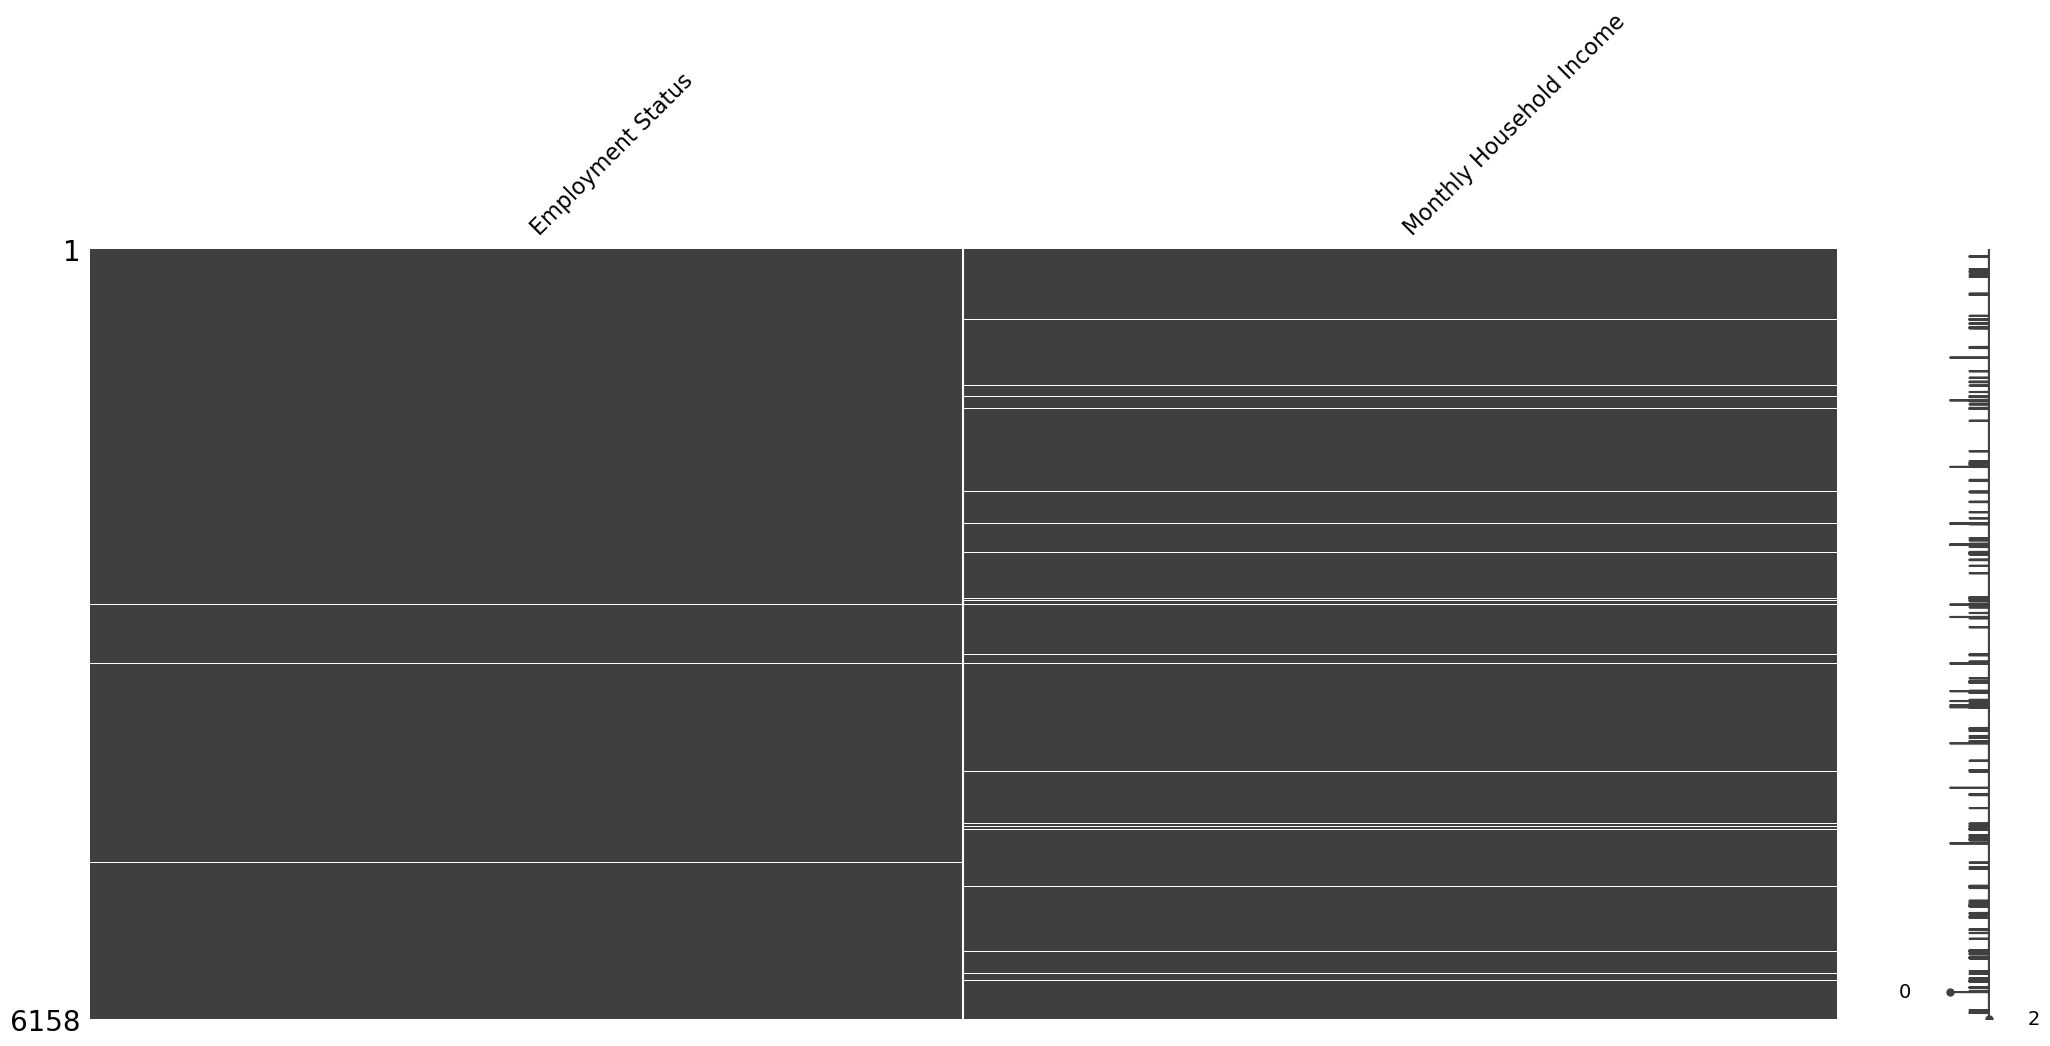

In [18]:
import missingno as msno
msno.matrix(df[['Employment Status',
       'Monthly Household Income']])
plt.show()

In [19]:
# ensuring all column names are standardized
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6158 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5805 non-null   object        
 1   location_latitude                   5805 non-null   float64       
 2   location_longitude                  5805 non-null   float64       
 3   location_altitude                   5805 non-null   float64       
 4   location_precision                  5805 non-null   float64       
 5   date_and_time                       6010 non-null   datetime64[ns]
 6   age                                 6140 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6140 non-null   object        
 9   no_of_children                      5533 non-null   float64       
 10  employment_status            

In [20]:
df.isna().sum()

location                               353
location_latitude                      353
location_longitude                     353
location_altitude                      353
location_precision                     353
date_and_time                          148
age                                     18
gender                                  17
marital_status                          18
no_of_children                         625
employment_status                       24
monthly_household_income               259
had_health_insurance?                   19
insurer                               2540
months_since_last_hospital_visit       158
had_health_insurance_during_visit?      56
had_routine_checkup_with_doctor         23
years_since_last_checkup              4382
had_cancer_screening?                   31
years_since_last_cancer_screening     4593
id                                       0
_submission_time                         0
dtype: int64

In [21]:
df.gender.isna().value_counts(normalize= True)

gender
False    0.997239
True     0.002761
Name: proportion, dtype: float64

In [22]:
# dropping null values in Gender column
df.dropna(subset=["gender"],inplace= True)

In [23]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                     11
gender                                   0
marital_status                          12
no_of_children                         618
employment_status                       19
monthly_household_income               254
had_health_insurance?                   14
insurer                               2529
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening     4579
id                                       0
_submission_time                         0
dtype: int64

In [24]:
# Filling the null values in the age column with the mode
df.age= df.age.fillna(df.age.mode()[0])

In [25]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                          12
no_of_children                         618
employment_status                       19
monthly_household_income               254
had_health_insurance?                   14
insurer                               2529
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening     4579
id                                       0
_submission_time                         0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5793 non-null   object        
 1   location_latitude                   5793 non-null   float64       
 2   location_longitude                  5793 non-null   float64       
 3   location_altitude                   5793 non-null   float64       
 4   location_precision                  5793 non-null   float64       
 5   date_and_time                       5998 non-null   datetime64[ns]
 6   age                                 6141 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6129 non-null   object        
 9   no_of_children                      5523 non-null   float64       
 10  employment_status            

In [27]:
bins=[0,1,2,3,4,5,6,7,8,9,800159.0, ]
labels=["0","1","2","3","4","5","6","7","8","9+"]
df["no_of_children"]=pd.cut(df["no_of_children"],bins=bins, labels=labels, right=False)
df["no_of_children"] = df["no_of_children"].cat.add_categories(['unknown']).fillna('unknown')

In [28]:
df["no_of_children"].value_counts()

no_of_children
2          1354
3          1027
0           946
1           852
unknown     619
4           457
5           420
6           219
8            99
7            74
9+           74
Name: count, dtype: int64

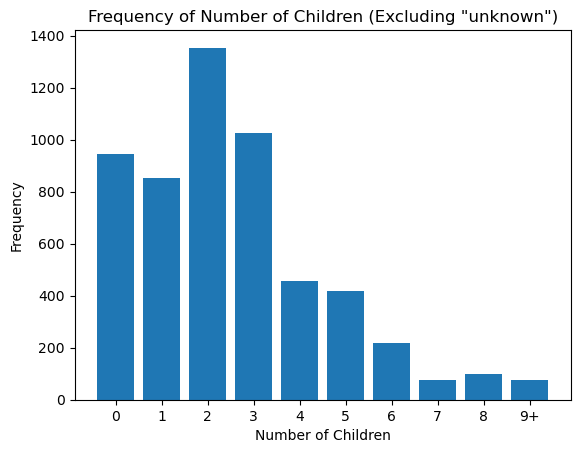

In [29]:

df['no_of_children'] = df['no_of_children'].str.strip().str.lower()  

# Filter out rows where 'no_of_children' is 'unknown' and create a copy of the filtered DataFrame
df_filtered = df[df['no_of_children'] != 'unknown'].copy()

# Count occurrences of each unique number of children
children_counts = df_filtered['no_of_children'].value_counts().sort_index()

# Plot the bar chart
plt.bar(children_counts.index, children_counts.values)

# Adding labels
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Children (Excluding "unknown")')

# Show the plot
plt.show()


In [30]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                          12
no_of_children                           0
employment_status                       19
monthly_household_income               254
had_health_insurance?                   14
insurer                               2529
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening     4579
id                                       0
_submission_time                         0
dtype: int64

In [31]:
marital_status_null=df[df["marital_status"].isna()]
marital_status_null

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,_submission_time
_index,,,,,,,,,,,,,,,,,,,,,,
939,-0.4589723 37.5648012 1393.0 4.84,-0.458972,37.564801,1393.000000,4.840,2023-06-15 10:49:00,31-40,Female,NaN,2,Self-employed,20001-30000,Yes,Jubilee insurance,2.0,Yes,No,NaN,No,NaN,245994871,2023-06-15 07:51:14
1397,-1.0976451 35.8809391 1858.5400390625 52.364,-1.097645,35.880939,1858.540039,52.364,2023-06-14 10:23:00,31-40,Male,NaN,2,Unemployed,Less than 10000,Yes,Nhif,8.0,Yes,Yes,1,Yes,4+,246562809,2023-06-17 08:33:10
1709,-1.3012975 36.9118816 1609.800048828125 72.9,-1.301297,36.911882,1609.800049,72.900,2023-06-19 17:03:00,31-40,Female,NaN,1,Employed,40001-50000,Yes,NHIF,1.0,Yes,No,NaN,No,NaN,247085288,2023-06-19 17:48:08
2047,-1.4877097 36.9491761 1576.5 3.9,-1.487710,36.949176,1576.500000,3.900,2023-06-21 08:54:00,31-40,Male,NaN,3,Employed,10001-20000,Yes,NHIF,6.0,Yes,No,NaN,No,NaN,247460278,2023-06-21 06:16:10
2608,-0.8346973 36.3521069 1878.8 96.0,-0.834697,36.352107,1878.800000,96.000,2023-06-22 14:52:00,51-60,Female,NaN,7,Unemployed,Less than 10000,Yes,NHIF,1.0,No,Yes,1,No,NaN,247932407,2023-06-22 17:20:32
2690,-0.4528733 37.5571338 1406.3 4.916,-0.452873,37.557134,1406.300000,4.916,2023-06-23 10:30:00,31-40,Male,NaN,2,Self-employed,20001-30000,No,NaN,1.0,No,No,NaN,Yes,4+,248037560,2023-06-23 07:31:20
3041,-1.0977077 35.8809155 1870.9228515625 6.085,-1.097708,35.880916,1870.922852,6.085,2023-06-21 15:03:00,18-30,Male,NaN,0,Unemployed,Less than 10000,Yes,NHIF,9.0,Yes,Yes,4+,Yes,4+,248606132,2023-06-26 08:35:52
3649,-0.92192 36.845055 1919.4 4.9,-0.921920,36.845055,1919.400000,4.900,2023-06-21 19:37:00,31-40,Female,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248974446,2023-06-27 18:07:08
3906,-1.3012503 36.9119933 1602.9000244140625 23.181,-1.301250,36.911993,1602.900024,23.181,2023-06-27 21:14:00,18-30,Male,NaN,unknown,Self-employed,Less than 10000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,249119910,2023-06-28 15:25:02


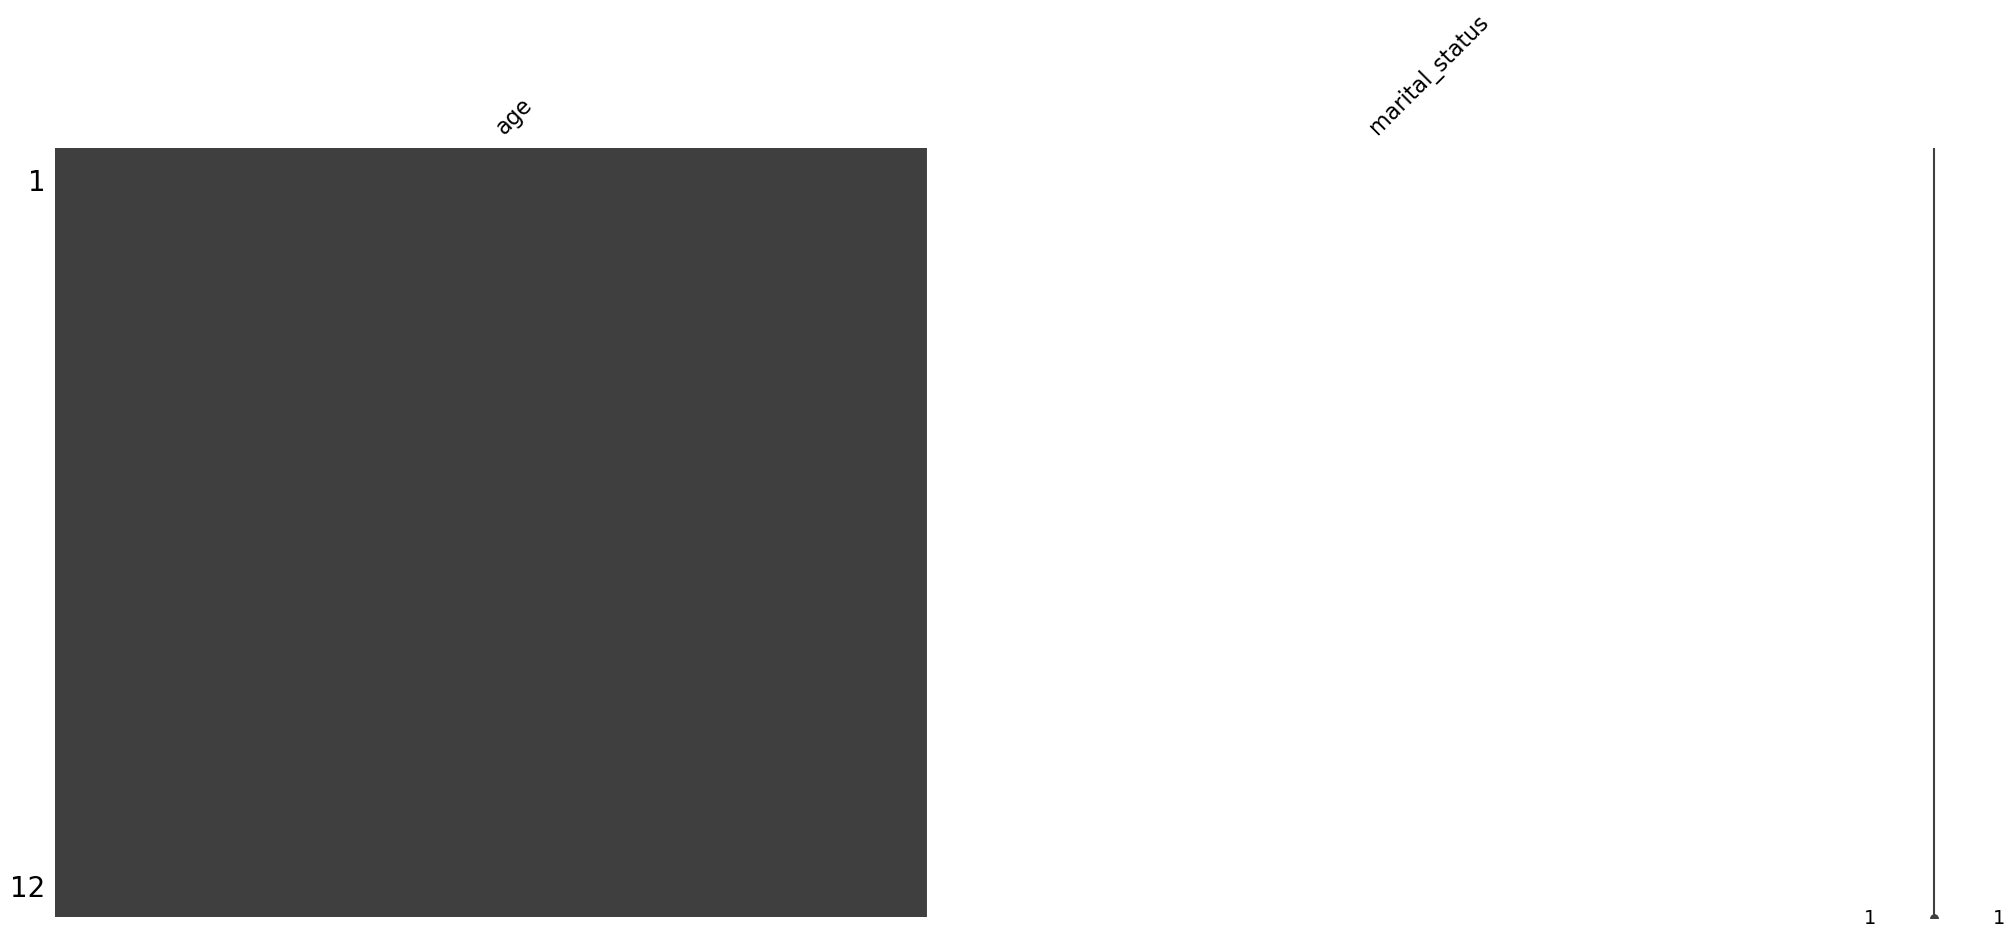

In [32]:
msno.matrix(marital_status_null[['age',
       'marital_status']])
plt.show()

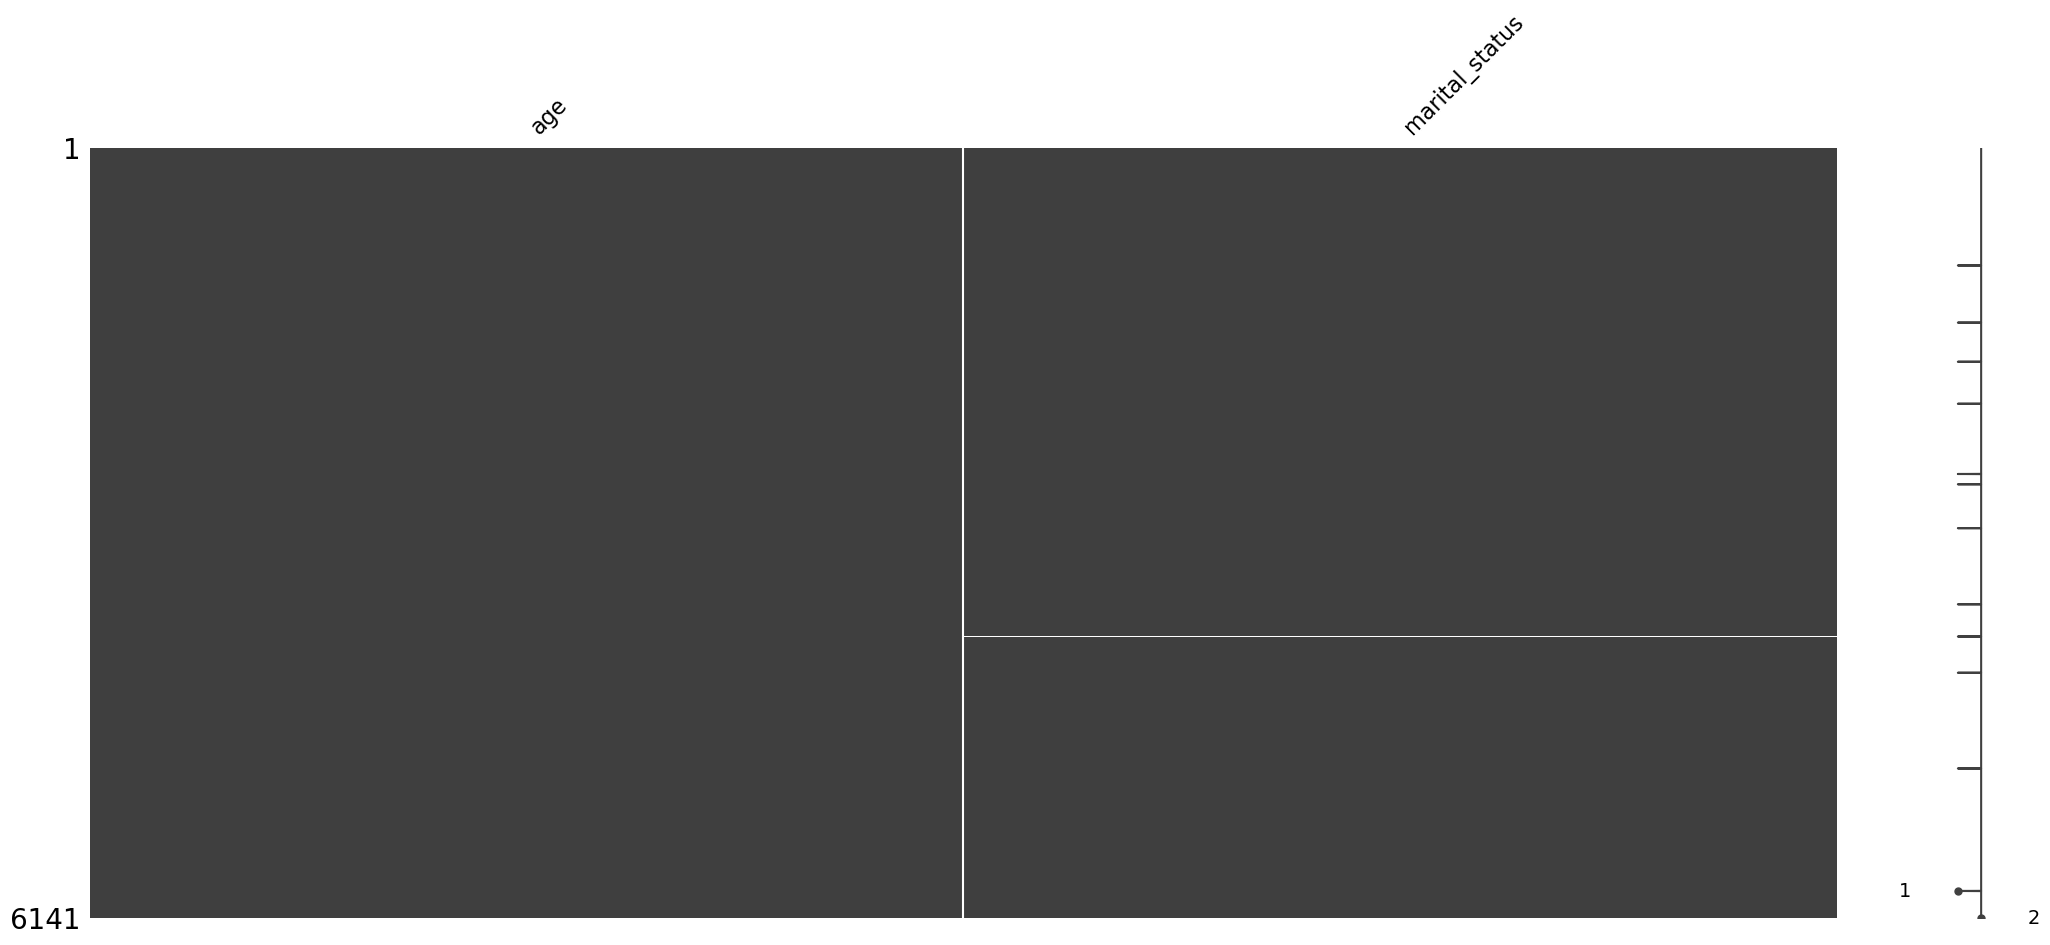

In [33]:
msno.matrix(df[['age',
       'marital_status']])
plt.show()

In [34]:

df[df["employment_status"].isna()]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,_submission_time
_index,,,,,,,,,,,,,,,,,,,,,,
162,-0.4978311 37.2803473 1541.2000732421875 4.966,-0.497831,37.280347,1541.200073,4.966,2023-05-24 11:43:00,31-40,Male,Married,4,NaN,40001-50000,Yes,NaN,NaN,Yes,Yes,3,Yes,2,240533413,2023-05-24 08:47:46
1210,-4.0075524 39.6917152 13.09999942779541 1.49,-4.007552,39.691715,13.099999,1.490,2023-06-16 10:41:00,18-30,Female,Single,unknown,NaN,NaN,No,NaN,NaN,No,No,NaN,No,NaN,246311255,2023-06-16 08:54:10
1211,NaN,NaN,NaN,NaN,NaN,NaT,18-30,Female,Single,0,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,246311256,2023-06-16 08:54:10
2194,-1.303438 36.9053816 1606.300048828125 13.546,-1.303438,36.905382,1606.300049,13.546,2023-06-21 08:51:00,18-30,Male,Single,unknown,NaN,NaN,No,NaN,3.0,No,No,NaN,No,NaN,247580222,2023-06-21 13:52:36
2197,-1.3085934 36.9026297 1608.5 39.799,-1.308593,36.902630,1608.500000,39.799,2023-06-21 09:10:00,18-30,Male,Single,unknown,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,247580234,2023-06-21 13:52:38
2362,-1.2977435 36.9072773 1600.0 3.9,-1.297743,36.907277,1600.000000,3.900,2023-06-22 08:52:00,18-30,Female,Single,unknown,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,247775042,2023-06-22 08:57:07
2365,-1.297784 36.9103475 1601.0 5.27,-1.297784,36.910348,1601.000000,5.270,2023-06-22 09:06:00,31-40,Male,Single,unknown,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,247775052,2023-06-22 08:57:09
2367,-1.2990914 36.9116771 1601.4000244140625 25.005,-1.299091,36.911677,1601.400024,25.005,2023-06-22 09:13:00,31-40,Male,Single,unknown,NaN,NaN,No,NaN,NaN,NaN,No,NaN,No,NaN,247775055,2023-06-22 08:57:10
2844,-1.312358 36.8988735 1610.2000732421875 21.535,-1.312358,36.898874,1610.200073,21.535,2023-06-23 08:50:00,18-30,Female,Single,unknown,NaN,NaN,No,NaN,36.0,No,No,NaN,No,NaN,248154420,2023-06-23 15:02:24


In [35]:
df["marital_status"]=df["marital_status"].fillna("Undisclosed")
df["employment_status"]=df["employment_status"].fillna("Undisclosed")


In [36]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income               254
had_health_insurance?                   14
insurer                               2529
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening     4579
id                                       0
_submission_time                         0
dtype: int64

In [37]:
df["monthly_household_income"].value_counts()

monthly_household_income
Less than 10000    1830
10001-20000        1430
20001-30000        1258
40001-50000         719
50001+              528
30001-40000         122
Name: count, dtype: int64

In [38]:
# Fill NaN values with 'Less than 10000' for rows where 'employment_status' is 'Unemployed'
df.loc[df["monthly_household_income"].isna() & (df["employment_status"] == "Unemployed"), "monthly_household_income"] = "Less than 10000"
df["monthly_household_income"]=df["monthly_household_income"].fillna("Undisclosed")


In [39]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                   14
insurer                               2529
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening     4579
id                                       0
_submission_time                         0
dtype: int64

In [40]:
df["had_health_insurance?"]. value_counts()

had_health_insurance?
Yes    3552
No     2575
Name: count, dtype: int64

In [41]:

df['insurer'] = df['insurer'].str.strip().str.upper()

df.loc[df['had_health_insurance?'].isna() & (df['insurer']=="NHIF"),'had_health_insurance?'] = "Yes"
df.loc[df['had_health_insurance?'].isna() & (df['employment_status']=="Employed"),'had_health_insurance?'] = "Yes"
df.loc[df['had_health_insurance?'].isna() & (df['had_health_insurance_during_visit?']=="No"),'had_health_insurance?'] = "No"
# df.loc[df['had_health_insurance?'].isna() & (df['had_health_insurance_during_visit?']=="No"),'had_health_insurance?'] = "No"
df.dropna(subset='had_health_insurance?',  inplace= True)


In [42]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                           0
no_of_children                           0
employment_status                        0
monthly_household_income                 0
had_health_insurance?                    0
insurer                               2526
months_since_last_hospital_visit       152
had_health_insurance_during_visit?      49
had_routine_checkup_with_doctor         17
years_since_last_checkup              4366
had_cancer_screening?                   25
years_since_last_cancer_screening     4577
id                                       0
_submission_time                         0
dtype: int64

In [43]:
df.loc[(df["had_health_insurance?"]=="No"), "insurer"]="Not_Insured"

In [44]:
df.insurer.value_counts()

insurer
NHIF                                           2682
Not_Insured                                    2581
BRITAM                                           93
MAKUENI CARE                                     84
JUBILEE                                          71
APA INSURANCE                                    56
JUBILEE INSURANCE                                49
APA                                              40
MADISON                                          38
LINDA MAMA                                       28
CIC                                              28
NSSF                                             25
AAR                                              22
MINET                                            21
CIC INSURANCE                                    15
MADISON INSURANCE                                14
DIRECTLINE INSURANCE                             13
NHIF\nJUBILEE                                    10
UON                                               9
PERS

In [109]:
df['insurer'] = df['insurer'].str.strip().str.upper()

In [111]:
words_to_remove=["INSURANCE", "BANK", "CARE","COMPANY", "PLC", "COVER", "GROUP","LIMITED","LTD","KENYA","OF",""]

In [121]:
joined="|".join(words_to_remove)
df["insurer"]=df["insurer"].str.replace(joined,"",regex=True).str.strip()

In [123]:
df.insurer.value_counts()

insurer
NHIF                            2689
NOT_INSURED                     2581
JUBILEE                          127
BRITAM                           103
APA                               96
MAKUENI                           84
CIC                               52
MADISON                           52
LINDA MAMA                        28
AON MINET                         26
NSSF                              25
AAR                               25
DIRECTLINE                        17
HEALTH                            13
NHIF\nJUBILEE                     11
UON                                9
COOPERATIVE                        9
PERSONAL                           8
LIFE                               6
UAP                                5
NHIF\nBRITAM                       5
AON NHIF                           4
NHIF\nAPA                          3
SANLAM                             3
NHIF, EQUITY AFIA                  3
EQUITY AFIA                        3
BRITAM\nNHIF                  

In [99]:
df.insurer.isna().sum()

36

In [46]:
df['insurer'] = df['insurer'].str.strip().str.upper()

In [101]:
df.insurer.nunique()

154

In [103]:
insurance_mapping={
    "CIC INSURANCE":"CIC",
    "JUBILEE INSURANCE":"JUBILEE",
    "APA INSURANCE":"APA",
    "BRITAM INSURANCE":"BRITAM",
    "JUBILEE INSURANCE COMPANY":"JUBILEE",
    "CIC GROUP INSURANCE":"CIC",
    "UAP INSURANCE":"UAP",
    "CIC INSURANCE COVER":"CIC",
    "BRIT INSURANCE":"BRITAM",
    "KENNEDIN PLC COMPANY LIMITED":"KENINDIA",
    "KENINDIA INSURACE":"KENINDIA",
    "BRITAM HOLDINGS":"BRITAM INSURANCE",
    "JUBILEE INSURANCE OF KENYA COMPANY":"JUBILEE INSURANCE",
    "JUBILEE INSURANCES":"JUBILEE INSURANCE",
    "THE NATIONAL HOSPITAL INSURANCE FUND (NHIF)":"NHIF",
    "HIF":"NHIF",
    "BRITAM COVER":"BRITAM INSURANCE",
    "NHIF.":"NHIF",
    "CIC INSURANCE GROUP":"CIC INSURANCE",
    "AON":"AON MINET",
    "MINET":"AON MINET",
    "CIC MEDICAL COVER":"CIC INSURANCE",
    "NULL":"NOT_APPLICABLE",
    "MADISON":"MADISON INSURANCE",
    "NONE":"NOT_APPLICABLE",
    "DIRECT LINE":"DIRECTLINE INSURANCE",
    "N/A ":"NOT_APPLICABLE",
    ".":"NOT_APPLICABLE",
    "MHIF":"NHIF",
    "COOPERATIVE BANK":"COOPERATIVE BANK CARE",
    "AAR":"AAR INSURANCE",
    "NO":"NOT_APPLICABLE",
    "NOT APPLICABLE":"NOT_APPLICABLE",
    "SIDIAN COVER":"SIDIAN BANK CARE",
    "5":"NOT_APPLICABLE",
    "NHIT":"NHIF",
    "JUBILEE INSURANCE COMPANY LIMITED":"JUBILEE INSURANCE",
    "COOPERATIVE BANK INSURANCE":"COOPERATIVE BANK CARE",
    "NIL":"NOT_APPLICABLE",
    "JUBILEE INSURANCE COMPANY LTD":"JUBILEE INSURANCE",
    "KENNIDA INSURANCE COMPANY":"KENINDIA INSURACE",
    "ABSA BANK INSURANCE":"ABSA BANK CARE",
    "ARA":"AAR INSURANCE",
    "SANLAM":"SANLAM INSURANCE",
    "SANLAM KENYA":"SANLAM INSURANCE",
    "NHIF COVER":"NHIF",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    "":"",
    
    
}

In [105]:
df["insurer"]= df["insurer"].replace(insurance_mapping)

In [107]:
df["insurer"].nunique()

118

In [123]:
df["insurer"].value_counts()

insurer
NHIF                                    2689
NOT_INSURED                             2575
JUBILEE INSURANCE                        127
BRITAM INSURANCE                         103
APA INSURANCE                             96
MAKUENI CARE                              84
CIC INSURANCE                             52
MADISON INSURANCE                         52
LINDA MAMA                                28
AON MINET                                 26
NSSF                                      25
AAR INSURANCE                             25
DIRECTLINE INSURANCE                      17
NHIF\nJUBILEE                             10
UON                                        9
COOPERATIVE BANK CARE                      8
PERSONAL INSURANCE                         8
HEALTH                                     6
HEALTH COVER                               6
UAP INSURANCE                              5
NHIF\nBRITAM                               5
AON NHIF                                   4
LI

In [50]:
# Split the values by either comma or newline and expand into separate columns
df_split = df[df['insurer'] !="NOT_APPLICABLE"]["insurer"].str.split(r'[,\n]', expand=True)

# Display the result
df_split


,0,1,2,3
_index,,,,
1,NHIF,None,None,None
2,NOT_INSURED,None,None,None
3,NOT_INSURED,None,None,None
4,NHIF,None,None,None
5,NHIF,None,None,None
6,NHIF,None,None,None
7,NHIF,None,None,None
8,NOT_INSURED,None,None,None
9,NHIF,None,None,None


In [51]:
df[df['insurer']=="NSSF"]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,_submission_time
_index,,,,,,,,,,,,,,,,,,,,,,
592,-1.1596097 36.9578036 1578.63 3.9,-1.159610,36.957804,1578.63,3.900,2023-06-13 18:32:00,18-30,Female,Married,1,Employed,20001-30000,Yes,NSSF,6.0,Yes,Yes,1,Yes,2,245564702,2023-06-13 16:42:35
599,-0.132995 35.4140263 1849.4 4.094,-0.132995,35.414026,1849.40,4.094,2023-06-13 10:01:00,31-40,Male,Married,3,Self-employed,50001+,Yes,NSSF,12.0,Yes,Yes,4+,Yes,4+,245567273,2023-06-13 16:51:18
603,-0.1287462 35.4113637 1919.8 4.5,-0.128746,35.411364,1919.80,4.500,2023-06-13 11:28:00,18-30,Male,Married,2,Employed,40001-50000,Yes,NSSF,3.0,Yes,Yes,4+,Yes,4+,245567288,2023-06-13 16:51:19
760,-0.1305517 35.412235 1865.7 4.8,-0.130552,35.412235,1865.70,4.800,2023-06-14 09:10:00,18-30,Female,Single,0,Employed,50001+,Yes,NSSF,5.0,Yes,Yes,4+,Yes,4+,245782695,2023-06-14 12:59:54
764,-0.1326407 35.4142135 1924.8 9.56,-0.132641,35.414214,1924.80,9.560,2023-06-14 10:11:00,31-40,Male,Married,2,Employed,10001-20000,Yes,NSSF,8.0,Yes,Yes,4+,Yes,4+,245782710,2023-06-14 12:59:55
1357,-0.1334482 35.4138101 1868.3 5.22,-0.133448,35.413810,1868.30,5.220,2023-06-16 08:29:00,60+,Male,Married,6,Self-employed,20001-30000,Yes,NSSF,6.0,Yes,Yes,3,Yes,3,246447116,2023-06-16 17:07:44
1358,-0.1334722 35.4138279 1868.2 4.963,-0.133472,35.413828,1868.20,4.963,2023-06-16 09:06:00,31-40,Female,Married,2,Unemployed,20001-30000,Yes,NSSF,5.0,Yes,Yes,2,Yes,4+,246447121,2023-06-16 17:07:45
1363,-0.1298985 35.4118036 1868.6 4.9,-0.129899,35.411804,1868.60,4.900,2023-06-16 11:40:00,41-50,Female,Married,2,Employed,40001-50000,Yes,NSSF,12.0,Yes,Yes,4+,Yes,4+,246447145,2023-06-16 17:07:47
1598,-0.128815 35.4110522 1963.5 5.225,-0.128815,35.411052,1963.50,5.225,2023-06-19 15:30:00,60+,Female,Divorced,6,Self-employed,40001-50000,Yes,NSSF,2.0,Yes,Yes,3,Yes,4+,247003086,2023-06-19 13:04:02


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5793 non-null   object        
 1   location_latitude                   5793 non-null   float64       
 2   location_longitude                  5793 non-null   float64       
 3   location_altitude                   5793 non-null   float64       
 4   location_precision                  5793 non-null   float64       
 5   date_and_time                       5998 non-null   datetime64[ns]
 6   age                                 6141 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6129 non-null   object        
 9   no_of_children                      6141 non-null   object        
 10  employment_status            

In [53]:
df["had_cancer_screening?"].value_counts()

had_cancer_screening?
No     4651
Yes    1463
Name: count, dtype: int64

In [54]:
df.loc[(df["had_cancer_screening?"]=="No"), "years_since_last_cancer_screening"]="Not_Applicable"

In [55]:
df[df["years_since_last_cancer_screening"].isna()]

,location,location_latitude,location_longitude,location_altitude,location_precision,date_and_time,age,gender,marital_status,no_of_children,employment_status,monthly_household_income,had_health_insurance?,insurer,months_since_last_hospital_visit,had_health_insurance_during_visit?,had_routine_checkup_with_doctor,years_since_last_checkup,had_cancer_screening?,years_since_last_cancer_screening,id,_submission_time
_index,,,,,,,,,,,,,,,,,,,,,,
50,-0.723026 37.1390699 1348.300048828125 20.0,-0.723026,37.139070,1348.300049,20.000,2023-05-18 13:11:00,18-30,Male,Single,0,Unemployed,10001-20000,Yes,NHIF,24.0,Yes,No,NaN,NaN,NaN,239128065,2023-05-18 10:48:55
93,-0.7151827 37.1466259 1365.7000732421875 14.096,-0.715183,37.146626,1365.700073,14.096,2023-05-18 16:40:00,31-40,Female,Married,3,Employed,20001-30000,Yes,NHIF,2.0,Yes,Yes,1,NaN,NaN,239186552,2023-05-18 13:52:00
278,-1.2690989 36.7178502 1874.9000244140625 4.5,-1.269099,36.717850,1874.900024,4.500,2023-06-12 13:36:00,18-30,Female,Married,2,Unemployed,Less than 10000,No,NOT_INSURED,1.0,No,No,NaN,NaN,NaN,245199470,2023-06-12 10:47:08
351,-0.5374777 37.4537422 1342.2000732421875 2.386,-0.537478,37.453742,1342.200073,2.386,2023-06-12 18:13:00,18-30,Male,Single,unknown,Unemployed,Less than 10000,No,NOT_INSURED,5.0,No,NaN,NaN,NaN,NaN,245279118,2023-06-12 15:23:52
568,-0.3781266 35.9274389 2282.493408203125 26.8,-0.378127,35.927439,2282.493408,26.800,2023-06-13 11:58:00,18-30,Female,Married,2,Unemployed,Less than 10000,No,NOT_INSURED,1.0,No,No,NaN,NaN,NaN,245525685,2023-06-13 14:45:24
1090,-0.303555 36.08544 1810.2 4.6,-0.303555,36.085440,1810.200000,4.600,2023-06-15 19:18:00,51-60,Male,Married,3,Unemployed,Less than 10000,Yes,NHIF,12.0,No,No,NaN,NaN,NaN,246154015,2023-06-15 16:22:53
1146,-1.212515 36.9195191 1531.4000244140625 159.4,-1.212515,36.919519,1531.400024,159.400,2023-06-15 10:40:00,51-60,Male,Married,4,Self-employed,40001-50000,No,NOT_INSURED,3.0,No,No,NaN,Yes,NaN,246197368,2023-06-15 19:02:58
1793,-1.2818066 36.7350469 1810.300048828125 4.7,-1.281807,36.735047,1810.300049,4.700,2023-06-19 11:51:00,31-40,Male,Married,2,Employed,20001-30000,Yes,NHIF,2.0,Yes,No,NaN,Yes,NaN,247211171,2023-06-20 09:02:54
1952,-1.2271619 36.8799248 1603.0 13.929,-1.227162,36.879925,1603.000000,13.929,2023-06-12 19:31:00,41-50,Female,Married,2,Unemployed,Less than 10000,Yes,NHIF,8.0,Yes,No,NaN,Yes,NaN,247351070,2023-06-20 16:38:16


In [56]:
df["years_since_last_cancer_screening"].isna().sum()

46

In [57]:
df["years_since_last_cancer_screening"].value_counts()

years_since_last_cancer_screening
Not_Applicable    4651
4+                 418
1                  407
2                  365
3                  254
Name: count, dtype: int64

In [58]:
df.isna().sum()

location                               348
location_latitude                      348
location_longitude                     348
location_altitude                      348
location_precision                     348
date_and_time                          143
age                                      0
gender                                   0
marital_status                          12
no_of_children                           0
employment_status                       19
monthly_household_income                24
had_health_insurance?                   14
insurer                                 45
months_since_last_hospital_visit       154
had_health_insurance_during_visit?      52
had_routine_checkup_with_doctor         19
years_since_last_checkup              4368
had_cancer_screening?                   27
years_since_last_cancer_screening       46
id                                       0
_submission_time                         0
dtype: int64

In [59]:
df["had_routine_checkup_with_doctor"].isna().sum()

19

In [60]:
df.loc[(df["had_routine_checkup_with_doctor"]=="No"), "years_since_last_checkup"]="Not_Applicable"

In [61]:
df["had_routine_checkup_with_doctor"].value_counts()

had_routine_checkup_with_doctor
No     4332
Yes    1790
Name: count, dtype: int64

In [62]:
df["years_since_last_checkup"].isna().sum()


39

In [63]:
df.isna().sum()

location                              348
location_latitude                     348
location_longitude                    348
location_altitude                     348
location_precision                    348
date_and_time                         143
age                                     0
gender                                  0
marital_status                         12
no_of_children                          0
employment_status                      19
monthly_household_income               24
had_health_insurance?                  14
insurer                                45
months_since_last_hospital_visit      154
had_health_insurance_during_visit?     52
had_routine_checkup_with_doctor        19
years_since_last_checkup               39
had_cancer_screening?                  27
years_since_last_cancer_screening      46
id                                      0
_submission_time                        0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 1 to 6158
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5793 non-null   object        
 1   location_latitude                   5793 non-null   float64       
 2   location_longitude                  5793 non-null   float64       
 3   location_altitude                   5793 non-null   float64       
 4   location_precision                  5793 non-null   float64       
 5   date_and_time                       5998 non-null   datetime64[ns]
 6   age                                 6141 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6129 non-null   object        
 9   no_of_children                      6141 non-null   object        
 10  employment_status            

In [65]:
df["months_since_last_hospital_visit"].value_counts()

months_since_last_hospital_visit
2.00       944
3.00       798
1.00       712
5.00       690
6.00       590
4.00       446
8.00       308
9.00       259
12.00      200
7.00       153
10.00      104
13.00       86
18.00       69
14.00       62
24.00       61
15.00       59
11.00       56
16.00       39
0.00        36
17.00       26
36.00       25
21.00       22
25.00       19
23.00       18
0.50        16
19.00       16
0.20        16
0.30        14
20.00       11
1.50        10
22.00        9
0.60         8
26.00        7
52.00        6
0.90         6
48.00        5
0.25         5
29.00        5
28.00        5
32.00        4
33.00        4
31.00        4
0.80         4
4.50         4
0.70         4
3.50         3
60.00        3
2.50         3
0.40         3
7.50         2
41.00        2
42.00        2
38.00        2
8.50         2
6.50         2
30.00        2
0.10         2
27.00        2
44.00        1
43.00        1
34.00        1
50.00        1
53.00        1
2021.00      1
40.00  

In [66]:
df["months_since_last_hospital_visit"].isna().sum()

154

In [67]:
# Creating column with years since last visit instead of months
df['years_since_last_hospital_visit'] = (df['months_since_last_hospital_visit'] / 12).round(2)

# Define the year bins and labels
bins = [0, 1, 2, 3, 4, 5, 10]
labels=["0-1 year","1-2 years","2-3 years","3-4 years","4-5 years","5+ years"]

# Bin the 'years_since_last_hospital_visit' data into these intervals
df['years_since_last_hospital_visit'] = pd.cut(df['years_since_last_hospital_visit'], bins=bins,labels=labels, right=False)

df['years_since_last_hospital_visit'].value_counts()


years_since_last_hospital_visit
0-1 year     5202
1-2 years     617
2-3 years     115
3-4 years      34
4-5 years      13
5+ years        4
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 1 to 6158
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   location                            5793 non-null   object        
 1   location_latitude                   5793 non-null   float64       
 2   location_longitude                  5793 non-null   float64       
 3   location_altitude                   5793 non-null   float64       
 4   location_precision                  5793 non-null   float64       
 5   date_and_time                       5998 non-null   datetime64[ns]
 6   age                                 6141 non-null   object        
 7   gender                              6141 non-null   object        
 8   marital_status                      6129 non-null   object        
 9   no_of_children                      6141 non-null   object        
 10  employment_status            

In [69]:
df.to_excel("healthcare2.xlsx") 